**1. Data Loading**

In [36]:
import pandas as pd
df = pd.read_csv("dataset.csv")

**2. Data Preview**

In [37]:
print(df.head())

  Category  Sales  Profit Region  Order Date
0        C  195.0   -3.26  South  2024-01-01
1        A  999.0     NaN  South  2024-01-02
2        C  833.0  258.89   West  2024-01-03
3        C  584.0  260.17  North  2024-01-04
4        A  506.0  153.24   East  2024-01-05


In [38]:
print(df.tail())

    Category  Sales  Profit Region  Order Date
145        C  243.0  -81.60   East  2024-05-25
146        C  445.0  -83.71   West  2024-05-26
147        C  723.0  242.18   West  2024-05-27
148        A  671.0  181.46   East  2024-05-28
149        A  980.0   89.67  South  2024-05-29


In [39]:
print(df.sample(5))

   Category  Sales  Profit Region  Order Date
31        C  605.0  163.05    NaN  2024-02-01
83        A    NaN     NaN  South  2024-03-24
90        A  152.0     NaN   West  2024-03-31
52        B  918.0  281.57   East  2024-02-22
75        B  724.0  250.95  South  2024-03-16


In [40]:
print(df.shape)

(150, 5)


In [41]:
print(df.columns)

Index(['Category', 'Sales', 'Profit', 'Region', 'Order Date'], dtype='object')


**3. Data Info**

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    150 non-null    object 
 1   Sales       135 non-null    float64
 2   Profit      135 non-null    float64
 3   Region      135 non-null    object 
 4   Order Date  150 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.0+ KB
None


In [43]:
print(df.describe())

            Sales      Profit
count  135.000000  135.000000
mean   575.903704  107.798667
std    239.447339  117.211602
min    101.000000  -96.320000
25%    364.500000    7.205000
50%    588.000000  121.740000
75%    767.000000  200.870000
max    999.000000  296.020000


In [44]:
print(df.isnull().sum())

Category       0
Sales         15
Profit        15
Region        15
Order Date     0
dtype: int64


In [45]:
print(df.isnull().mean()*100)

Category       0.0
Sales         10.0
Profit        10.0
Region        10.0
Order Date     0.0
dtype: float64


**4. Data Cleaning**  
- Use dropna()
- Use fillna()
- Use drop_duplicates()

In [47]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
print(df['Sales'])

0      195.0
1      999.0
2      833.0
3      584.0
4      506.0
       ...  
145    243.0
146    445.0
147    723.0
148    671.0
149    980.0
Name: Sales, Length: 150, dtype: float64


In [48]:
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
print(df['Profit'])

0       -3.260000
1      107.798667
2      258.890000
3      260.170000
4      153.240000
          ...    
145    -81.600000
146    -83.710000
147    242.180000
148    181.460000
149     89.670000
Name: Profit, Length: 150, dtype: float64


In [49]:
df['Region'] = df['Region'].fillna(df['Region'].mode())
print(df['Region'])

0      South
1      South
2       West
3      North
4       East
       ...  
145     East
146     West
147     West
148     East
149    South
Name: Region, Length: 150, dtype: object


In [50]:
print(df)

    Category  Sales      Profit Region  Order Date
0          C  195.0   -3.260000  South  2024-01-01
1          A  999.0  107.798667  South  2024-01-02
2          C  833.0  258.890000   West  2024-01-03
3          C  584.0  260.170000  North  2024-01-04
4          A  506.0  153.240000   East  2024-01-05
..       ...    ...         ...    ...         ...
145        C  243.0  -81.600000   East  2024-05-25
146        C  445.0  -83.710000   West  2024-05-26
147        C  723.0  242.180000   West  2024-05-27
148        A  671.0  181.460000   East  2024-05-28
149        A  980.0   89.670000  South  2024-05-29

[150 rows x 5 columns]


**5. Column Analysis**

In [51]:
print(df['Category'].nunique())

3


In [52]:
print(df['Category'].value_counts())

Category
C    56
A    48
B    46
Name: count, dtype: int64


In [53]:
print(df['Category'].value_counts(normalize=True))

Category
C    0.373333
A    0.320000
B    0.306667
Name: proportion, dtype: float64


In [54]:
print(df.select_dtypes(include='object'))

    Category Region  Order Date
0          C  South  2024-01-01
1          A  South  2024-01-02
2          C   West  2024-01-03
3          C  North  2024-01-04
4          A   East  2024-01-05
..       ...    ...         ...
145        C   East  2024-05-25
146        C   West  2024-05-26
147        C   West  2024-05-27
148        A   East  2024-05-28
149        A  South  2024-05-29

[150 rows x 3 columns]


**6. Grouping & Sorting**

In [55]:
print(df.groupby('Category')['Sales'].sum())

Category
A    25802.422222
B    26820.711111
C    33762.422222
Name: Sales, dtype: float64


In [56]:
print(df.groupby(['Region','Category'])['Sales'].mean())

Region  Category
East    A           533.536700
        B           573.272727
        C           386.980741
North   A           555.635979
        B           629.380741
        C           656.523747
South   A           650.878189
        B           559.223362
        C           605.645267
West    A           428.380741
        B           559.100000
        C           609.243981
Name: Sales, dtype: float64


In [59]:
print(df.sort_values(by='Sales',ascending=True))

    Category  Sales      Profit Region  Order Date
79         B  101.0   43.800000   East  2024-03-20
24         A  127.0  -10.290000  North  2024-01-25
10         C  135.0  211.950000   East  2024-01-11
90         A  152.0  107.798667   West  2024-03-31
76         B  180.0  196.310000  South  2024-03-17
..       ...    ...         ...    ...         ...
128        C  963.0  -30.680000   West  2024-05-08
135        C  971.0  281.950000   West  2024-05-15
149        A  980.0   89.670000  South  2024-05-29
107        C  983.0  208.000000  North  2024-04-17
1          A  999.0  107.798667  South  2024-01-02

[150 rows x 5 columns]


**7. Visualizations**

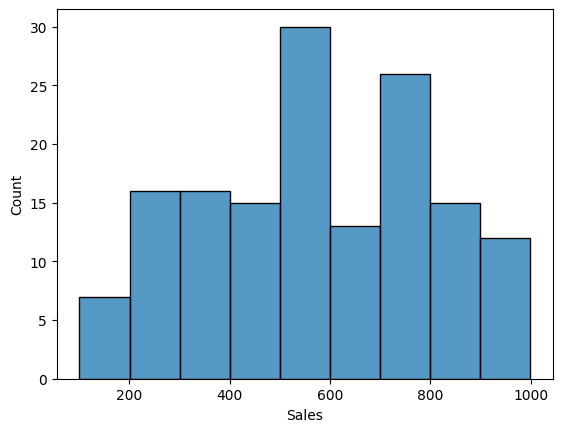

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Sales'])
plt.show()

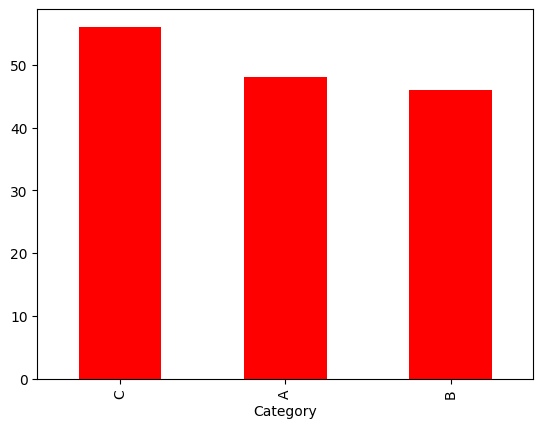

In [64]:
df['Category'].value_counts().plot(kind='bar',color = 'red')
plt.show()

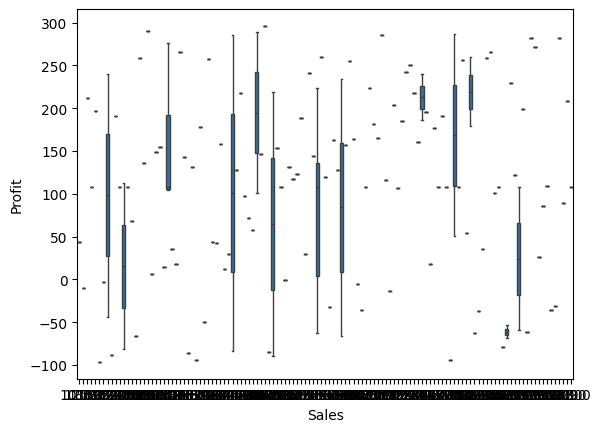

In [65]:
sns.boxplot(x='Sales',y='Profit',data=df)
plt.show()

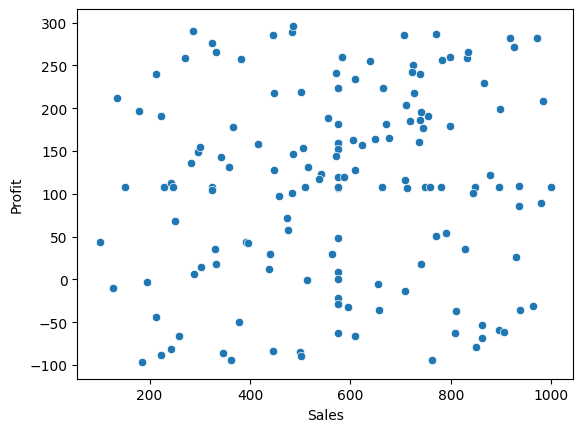

In [66]:
sns.scatterplot(x='Sales',y='Profit',data=df)
plt.show()

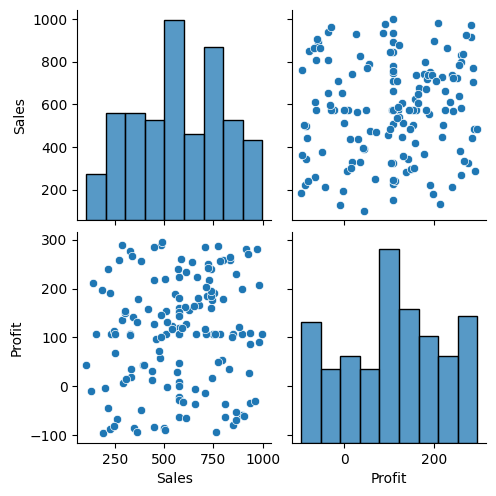

In [73]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [76]:
corr_matrix = df.select_dtypes(include='number').corr()
print(corr_matrix)


           Sales    Profit
Sales   1.000000  0.098177
Profit  0.098177  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

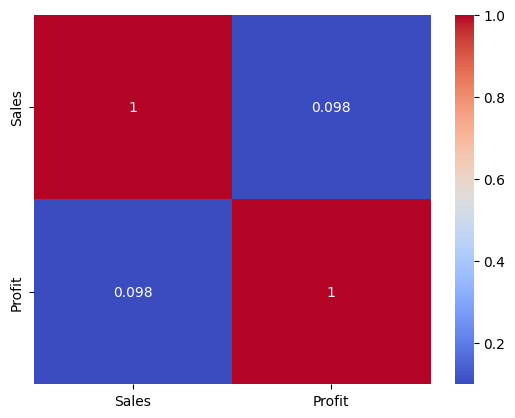

In [77]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show

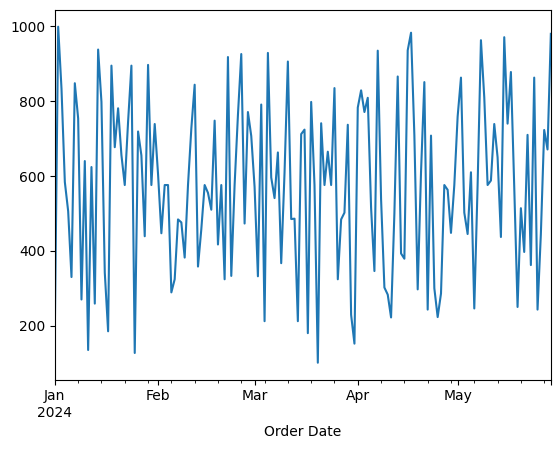

In [80]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Ensure datetime
df.groupby('Order Date')['Sales'].sum().plot()
plt.show()

**8. Visualize Missing Values**

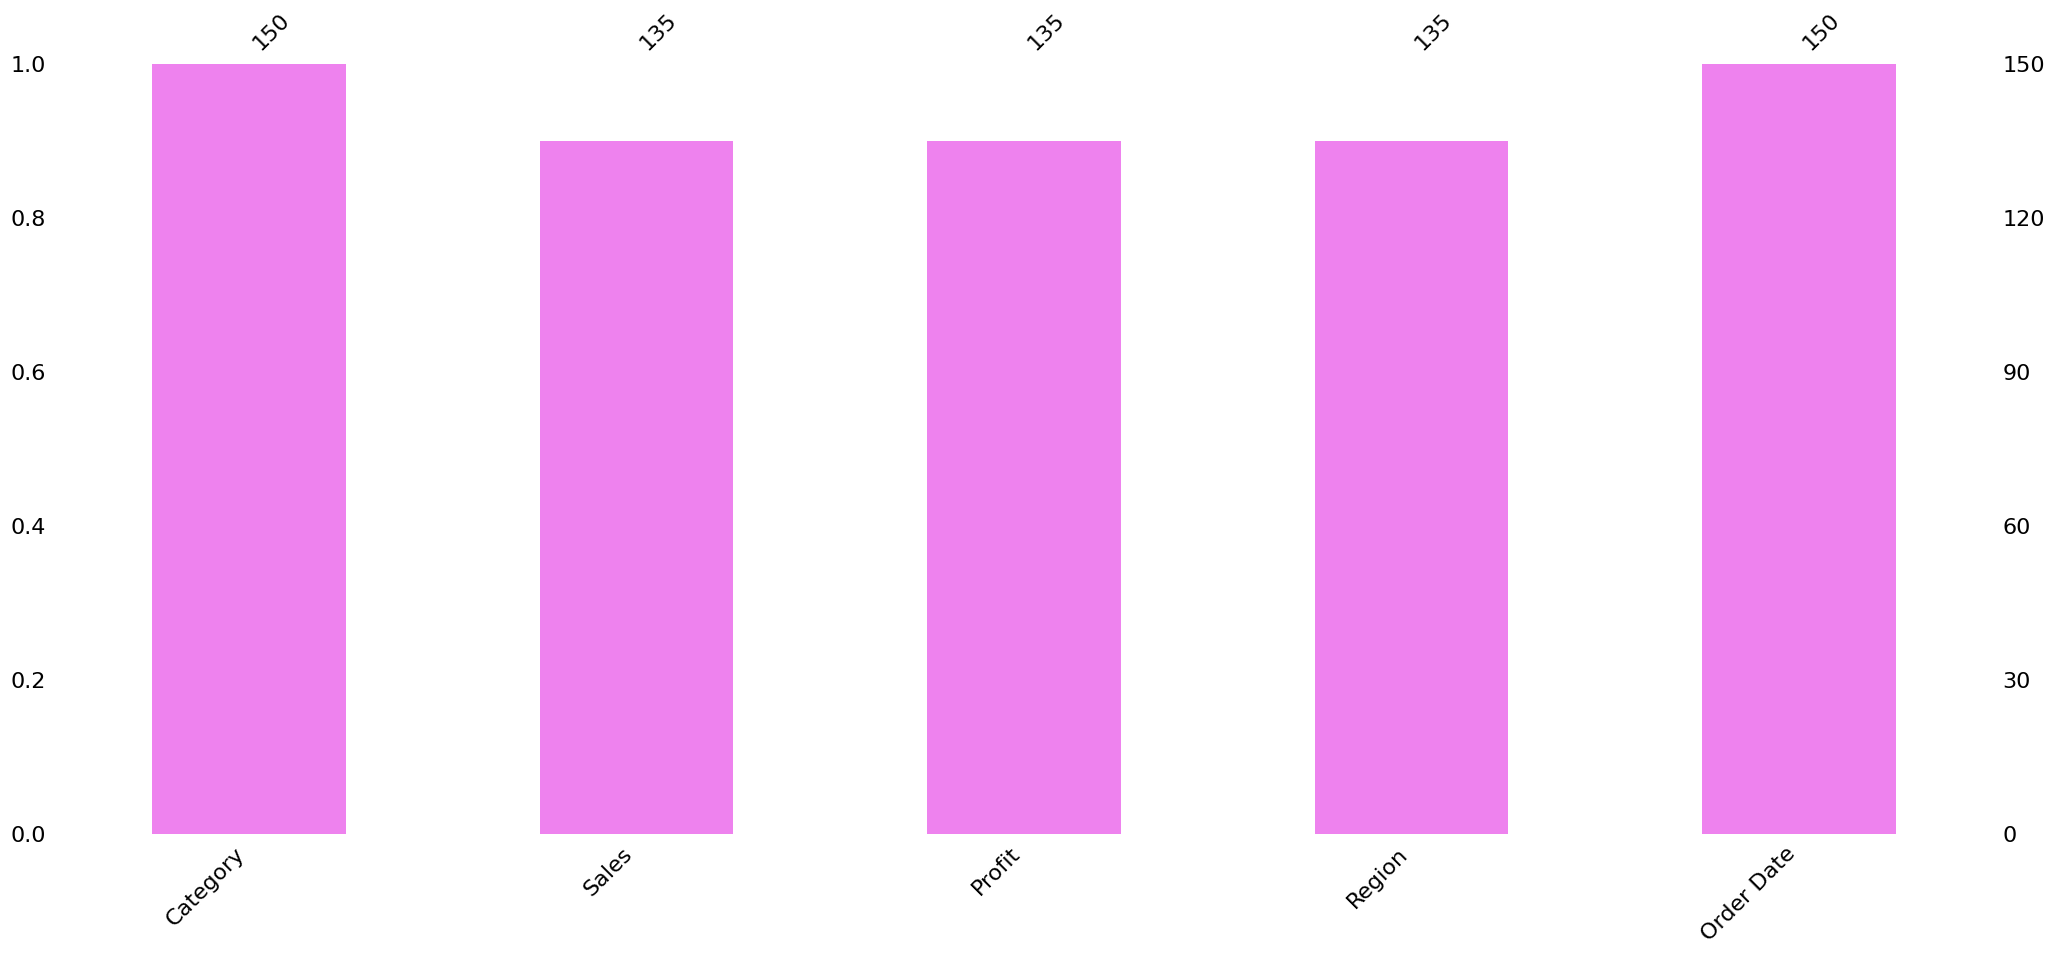

In [99]:
import pandas as pd
import missingno as msno
data = pd.read_csv("sample.csv")
plt.figure(figsize=(4, 2))
msno.bar(data,color = 'violet')
plt.show()

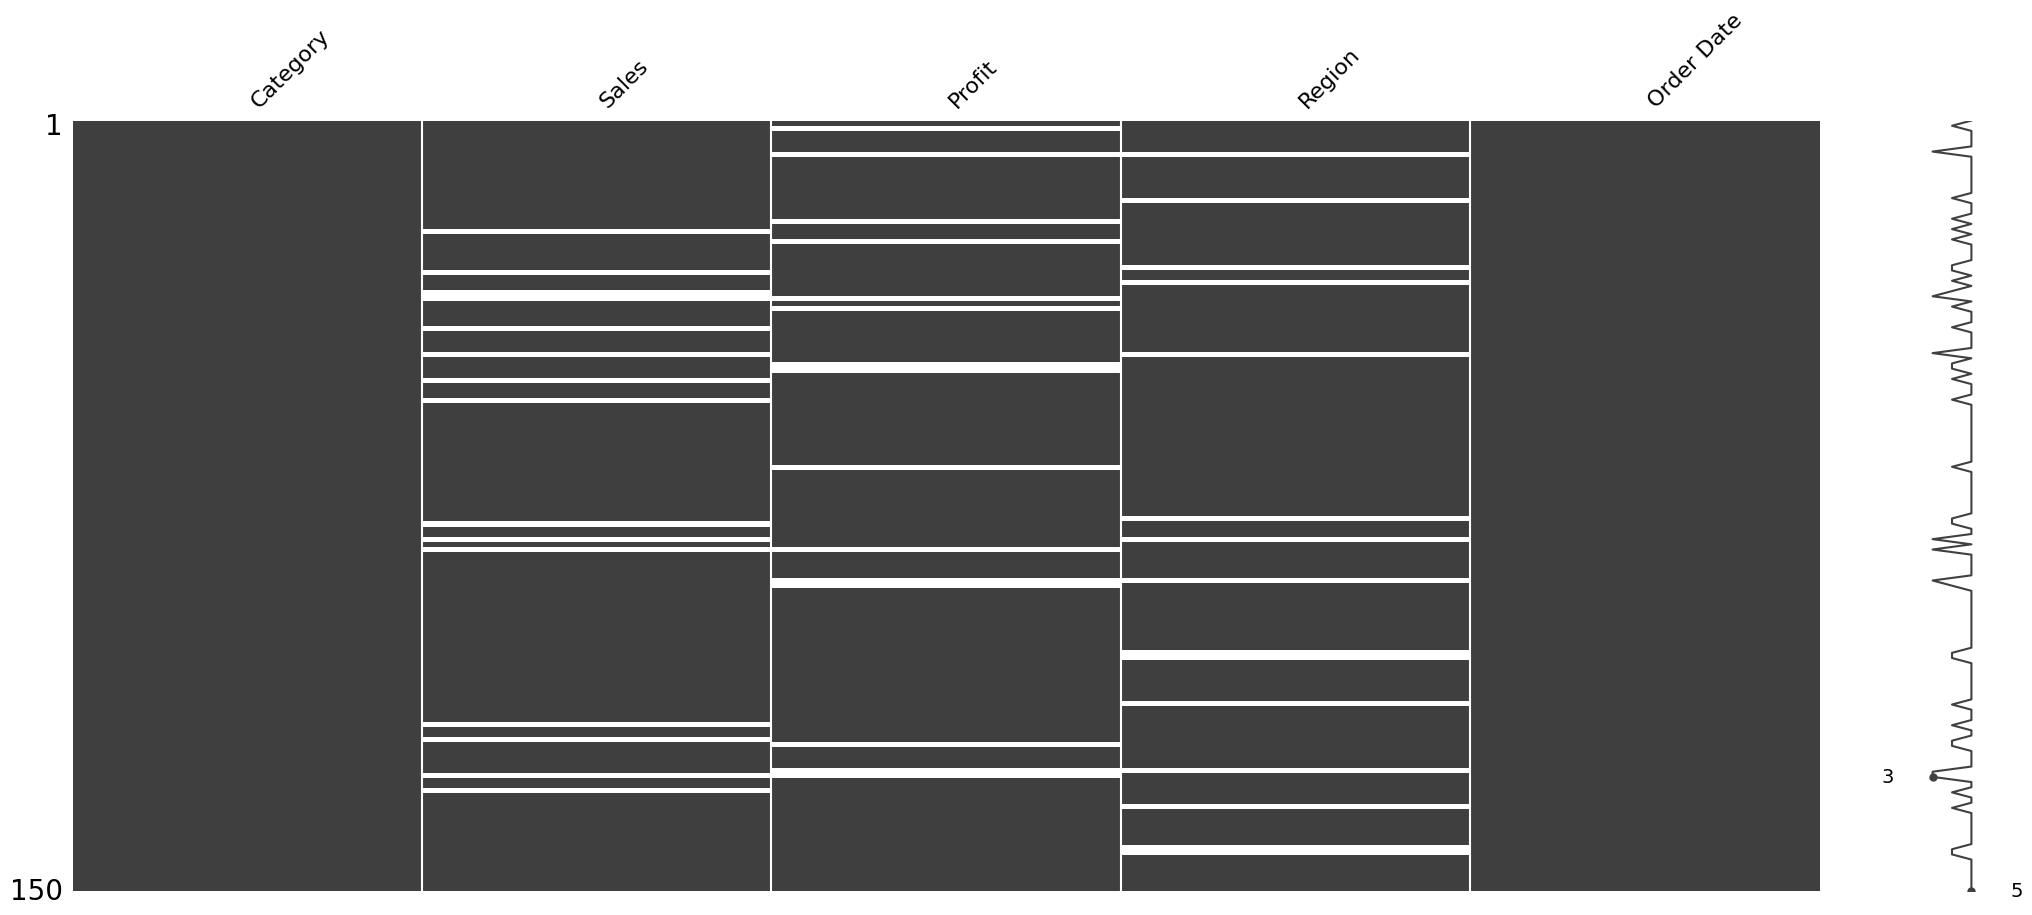

In [83]:
msno.matrix(data)
plt.show()

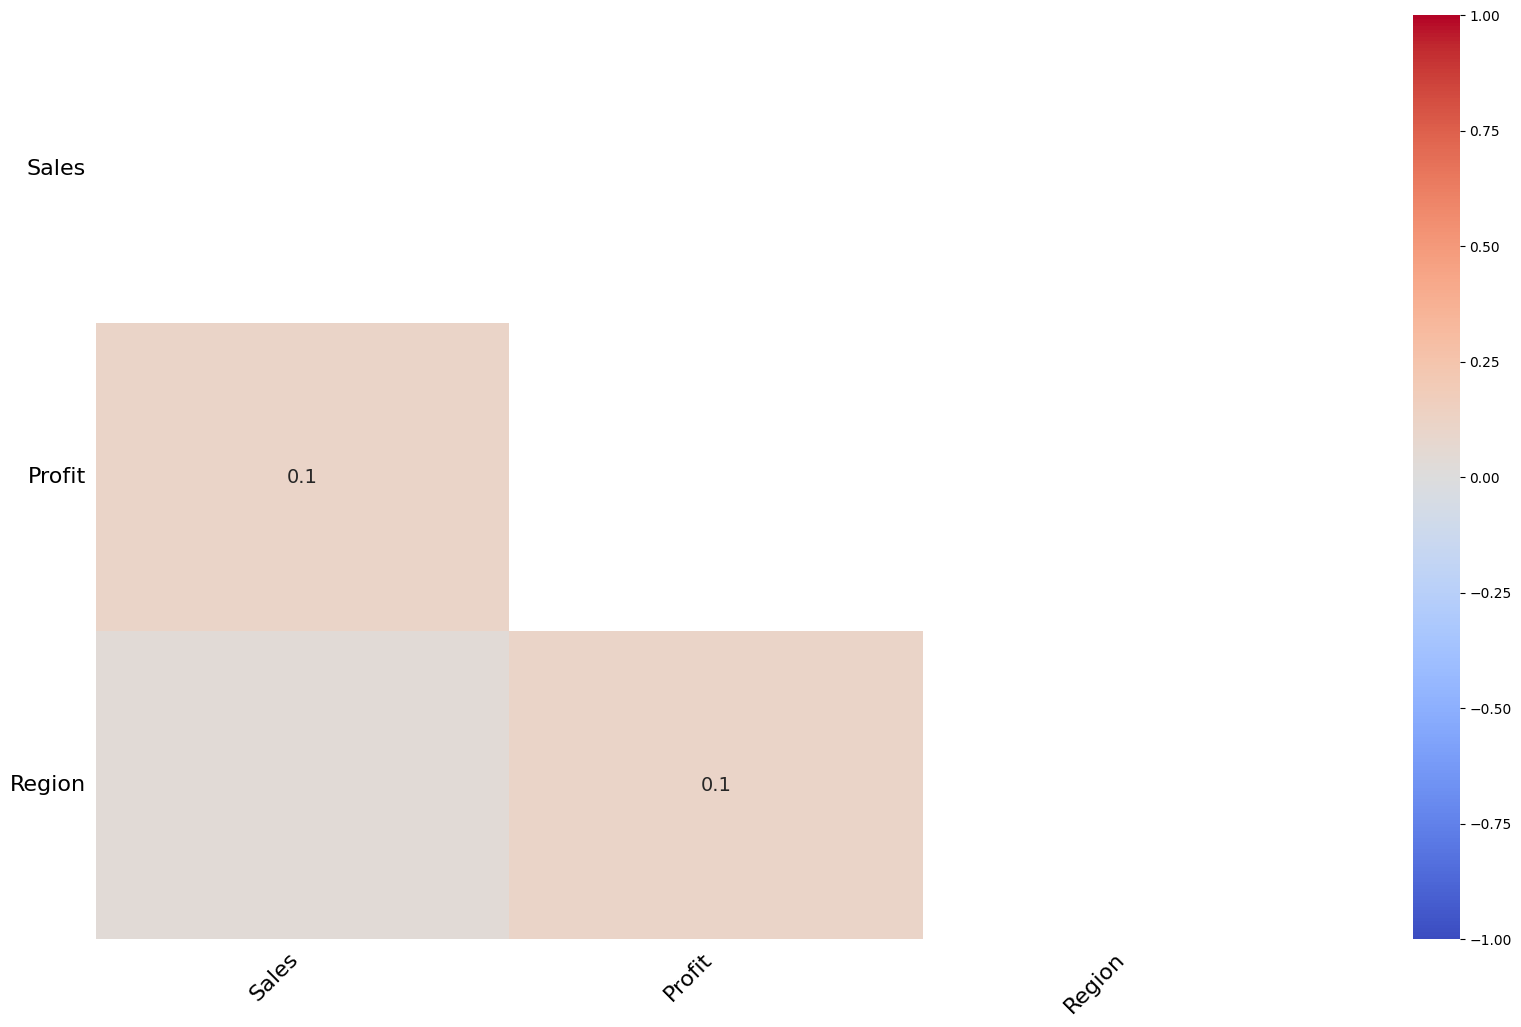

In [87]:
msno.heatmap(data,cmap = 'coolwarm')
plt.show()

**9. Quick Summary**

In [93]:
!pip install skimpy

In [92]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0        ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Sales     │    0 │      0 │   575.9 │   227.1 │       101 │     394 │   575.9 │   747.2 │    999 │ ▄▅▅██▅  │  │
│ │ Profit    │    0 │      0 │   107.8 │   111.2 │    -96.32 │   17.53 │   107.8 │   190.4 │    296 │ ▄▃▂█▄▄  │  │
│ └───────────┴──────┴────────┴─────────┴─────────┴───────────┴─────────┴─────────┴─────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column               ┃ NA     ┃ NA %      ┃ first                ┃ last                ┃ frequency         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order Date           │      0 │         0 │      2024-01-01      │     2024-05-29      │ D                 │  │
│ └──────────────────────┴────────┴───────────┴──────────────────────┴─────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column    ┃ NA  ┃ NA %  ┃ shortest  ┃ longest  ┃ min  ┃ max  ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Category  │   0 │     0 │ C         │ C        │ A    │ C    │             1 │             1 │         150 │  │
│ │ Region    │  15 │    10 │ West      │ South    │ East │ West │          4.53 │           0.9 │         135 │  │
│ └───────────┴─────┴───────┴───────────┴──────────┴──────┴──────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯